<a href="https://colab.research.google.com/github/jitbnerejee4/jit/blob/fastai/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *
from fastai.tabular import *
from fastai import *

In [2]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [2]:
path = Config.data_path()/'Titanic'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/Titanic')

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 5.14MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.0MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 60.1MB/s]


In [0]:
! mv train.csv /root/.fastai/data/Titanic

In [0]:
! mv test.csv /root/.fastai/data/Titanic
! mv gender_submission.csv /root/.fastai/data/Titanic

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/Titanic/models'),
 PosixPath('/root/.fastai/data/Titanic/train.csv'),
 PosixPath('/root/.fastai/data/Titanic/test.csv'),
 PosixPath('/root/.fastai/data/Titanic/gender_submission.csv')]

In [0]:
train = pd.read_csv(path/'train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.shape

(891, 12)

In [0]:
test = pd.read_csv(path/'test.csv')

In [0]:
test.isnull().sum()
test["Fare"] = test["Fare"].fillna(value =0)

In [0]:
#train.Survived = train.Survived.astype(float)
dep_var = 'Survived'
cat_names = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:
data = (TabularList.from_df(train, path=path, cat_names = cat_names, 
                            cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,200)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [16]:
data.show_batch(10)

Name,Sex,Ticket,Cabin,Embarked,Age_na,Age,SibSp,Parch,Fare,target
"Leitch, Miss. Jessie Wills",female,248727,#na#,S,True,-0.0741,-0.4610,-0.4658,-0.0106,1
"Johnson, Master. Harold Theodor",male,347742,#na#,S,False,-2.0271,0.5043,0.8064,-0.4247,1
"Goodwin, Mr. Charles Edward",male,CA 2144,#na#,S,False,-1.2459,4.3658,2.0785,0.2526,0
"Pears, Mr. Thomas Clinton",male,113776,C2,S,False,-0.0741,0.5043,-0.4658,0.6257,0
"Canavan, Miss. Mary",female,364846,#na#,Q,False,-0.6990,-0.4610,-0.4658,-0.4888,0
"O'Connell, Mr. Patrick D",male,334912,#na#,Q,True,-0.0741,-0.4610,-0.4658,-0.4891,0
"Perkin, Mr. John Henry",male,A/5 21174,#na#,S,False,-0.6209,-0.4610,-0.4658,-0.4982,0
"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,PC 17485,A20,C,False,1.4883,0.5043,-0.4658,0.4425,1
"Milling, Mr. Jacob Christian",male,234360,#na#,S,False,1.4102,-0.4610,-0.4658,-0.3894,0
"Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)",female,29750,#na#,S,False,0.7852,0.5043,0.8064,0.1030,1


In [0]:
learn = tabular_learner(data, layers=[1000,100,15],emb_drop=0.1, metrics=accuracy)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


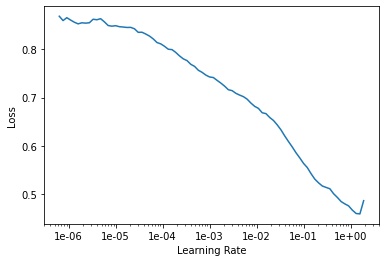

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(15, 1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.878268,0.763990,0.345000,00:00
1,0.873183,0.792122,0.345000,00:00
2,0.872704,0.807316,0.345000,00:00
3,0.870932,0.808594,0.350000,00:00
4,0.869390,0.803441,0.355000,00:00
5,0.863530,0.804640,0.380000,00:00
6,0.853519,0.804509,0.430000,00:00
7,0.847372,0.802815,0.420000,00:00
8,0.835911,0.798627,0.435000,00:00
9,0.833500,0.798060,0.415000,00:00


In [0]:
learn.save('stage-1')

In [23]:
learn.load('stage-1')

Learner(data=TabularDataBunch;

Train: LabelList (691 items)
x: TabularList
Name Vande Walle, Mr. Nestor Cyriel; Sex male; Ticket 345770; Cabin #na#; Embarked S; Age_na False; Age -0.1522; SibSp -0.4610; Parch -0.4658; Fare -0.4556; ,Name Sage, Mr. Frederick; Sex male; Ticket CA. 2343; Cabin #na#; Embarked S; Age_na True; Age -0.0741; SibSp 7.2619; Parch 2.0785; Fare 0.6815; ,Name Johanson, Mr. Jakob Alfred; Sex male; Ticket 3101264; Cabin #na#; Embarked S; Age_na False; Age 0.3165; SibSp -0.4610; Parch -0.4658; Fare -0.5125; ,Name Youseff, Mr. Gerious; Sex male; Ticket 2628; Cabin #na#; Embarked C; Age_na False; Age 1.2149; SibSp -0.4610; Parch -0.4658; Fare -0.4987; ,Name Cohen, Mr. Gurshon "Gus"; Sex male; Ticket A/5 3540; Cabin #na#; Embarked S; Age_na False; Age -0.9334; SibSp -0.4610; Parch -0.4658; Fare -0.4831; 
y: CategoryList
0,0,0,0,1
Path: /root/.fastai/data/Titanic;

Valid: LabelList (200 items)
x: TabularList
Name #na#; Sex male; Ticket #na#; Cabin #na#; Embarked S; Age_n

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


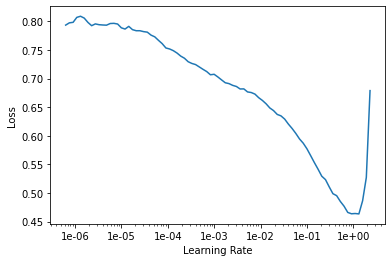

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(10,1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.796932,0.793918,0.485000,00:00
1,0.782693,0.780779,0.485000,00:00
2,0.763802,0.762494,0.500000,00:00
3,0.743143,0.746011,0.510000,00:00
4,0.722639,0.739708,0.580000,00:00
5,0.704187,0.735049,0.590000,00:00
6,0.689719,0.732406,0.580000,00:00
7,0.679329,0.733689,0.575000,00:00
8,0.674272,0.737360,0.580000,00:00
9,0.665835,0.736395,0.580000,00:00


In [0]:
learn.save('stage-2')

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


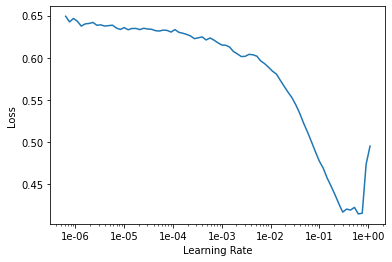

In [29]:
learn.recorder.plot()

In [30]:
learn.load('stage-2')

Learner(data=TabularDataBunch;

Train: LabelList (691 items)
x: TabularList
Name Vande Walle, Mr. Nestor Cyriel; Sex male; Ticket 345770; Cabin #na#; Embarked S; Age_na False; Age -0.1522; SibSp -0.4610; Parch -0.4658; Fare -0.4556; ,Name Sage, Mr. Frederick; Sex male; Ticket CA. 2343; Cabin #na#; Embarked S; Age_na True; Age -0.0741; SibSp 7.2619; Parch 2.0785; Fare 0.6815; ,Name Johanson, Mr. Jakob Alfred; Sex male; Ticket 3101264; Cabin #na#; Embarked S; Age_na False; Age 0.3165; SibSp -0.4610; Parch -0.4658; Fare -0.5125; ,Name Youseff, Mr. Gerious; Sex male; Ticket 2628; Cabin #na#; Embarked C; Age_na False; Age 1.2149; SibSp -0.4610; Parch -0.4658; Fare -0.4987; ,Name Cohen, Mr. Gurshon "Gus"; Sex male; Ticket A/5 3540; Cabin #na#; Embarked S; Age_na False; Age -0.9334; SibSp -0.4610; Parch -0.4658; Fare -0.4831; 
y: CategoryList
0,0,0,0,1
Path: /root/.fastai/data/Titanic;

Valid: LabelList (200 items)
x: TabularList
Name #na#; Sex male; Ticket #na#; Cabin #na#; Embarked S; Age_n

In [31]:
learn.fit_one_cycle(10, 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.619364,0.686557,0.605000,00:00
1,0.599134,0.711631,0.600000,00:00
2,0.583111,0.701882,0.625000,00:00
3,0.540809,0.649723,0.670000,00:00
4,0.486468,0.597841,0.705000,00:00
5,0.430508,0.582953,0.720000,00:00
6,0.380497,0.556838,0.735000,00:00
7,0.334808,0.554992,0.720000,00:00
8,0.298557,0.534788,0.745000,00:00
9,0.269922,0.541721,0.740000,00:00


In [0]:
learn.save('stage-3')

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


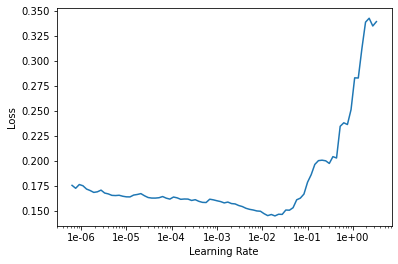

In [34]:
learn.recorder.plot()

In [35]:
learn.load('stage-3')

Learner(data=TabularDataBunch;

Train: LabelList (691 items)
x: TabularList
Name Vande Walle, Mr. Nestor Cyriel; Sex male; Ticket 345770; Cabin #na#; Embarked S; Age_na False; Age -0.1522; SibSp -0.4610; Parch -0.4658; Fare -0.4556; ,Name Sage, Mr. Frederick; Sex male; Ticket CA. 2343; Cabin #na#; Embarked S; Age_na True; Age -0.0741; SibSp 7.2619; Parch 2.0785; Fare 0.6815; ,Name Johanson, Mr. Jakob Alfred; Sex male; Ticket 3101264; Cabin #na#; Embarked S; Age_na False; Age 0.3165; SibSp -0.4610; Parch -0.4658; Fare -0.5125; ,Name Youseff, Mr. Gerious; Sex male; Ticket 2628; Cabin #na#; Embarked C; Age_na False; Age 1.2149; SibSp -0.4610; Parch -0.4658; Fare -0.4987; ,Name Cohen, Mr. Gurshon "Gus"; Sex male; Ticket A/5 3540; Cabin #na#; Embarked S; Age_na False; Age -0.9334; SibSp -0.4610; Parch -0.4658; Fare -0.4831; 
y: CategoryList
0,0,0,0,1
Path: /root/.fastai/data/Titanic;

Valid: LabelList (200 items)
x: TabularList
Name #na#; Sex male; Ticket #na#; Cabin #na#; Embarked S; Age_n

In [36]:
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.162954,0.536592,0.755000,00:00
1,0.141536,0.492087,0.790000,00:00
2,0.125865,0.694806,0.760000,00:00
3,0.113305,0.566221,0.790000,00:00
4,0.097976,0.695915,0.765000,00:00
5,0.080349,0.511257,0.780000,00:00
6,0.065434,0.509151,0.820000,00:00
7,0.053652,0.522349,0.820000,00:00
8,0.045572,0.505408,0.815000,00:00
9,0.038300,0.497272,0.820000,00:00


In [0]:
learn.save('stage-4')

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


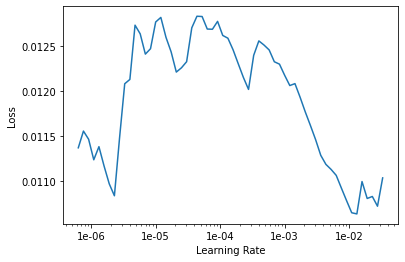

In [39]:
learn.recorder.plot()

In [55]:
learn.load('stage-4')

Learner(data=TabularDataBunch;

Train: LabelList (691 items)
x: TabularList
Name Vande Walle, Mr. Nestor Cyriel; Sex male; Ticket 345770; Cabin #na#; Embarked S; Age_na False; Age -0.1522; SibSp -0.4610; Parch -0.4658; Fare -0.4556; ,Name Sage, Mr. Frederick; Sex male; Ticket CA. 2343; Cabin #na#; Embarked S; Age_na True; Age -0.0741; SibSp 7.2619; Parch 2.0785; Fare 0.6815; ,Name Johanson, Mr. Jakob Alfred; Sex male; Ticket 3101264; Cabin #na#; Embarked S; Age_na False; Age 0.3165; SibSp -0.4610; Parch -0.4658; Fare -0.5125; ,Name Youseff, Mr. Gerious; Sex male; Ticket 2628; Cabin #na#; Embarked C; Age_na False; Age 1.2149; SibSp -0.4610; Parch -0.4658; Fare -0.4987; ,Name Cohen, Mr. Gurshon "Gus"; Sex male; Ticket A/5 3540; Cabin #na#; Embarked S; Age_na False; Age -0.9334; SibSp -0.4610; Parch -0.4658; Fare -0.4831; 
y: CategoryList
0,0,0,0,1
Path: /root/.fastai/data/Titanic;

Valid: LabelList (200 items)
x: TabularList
Name #na#; Sex male; Ticket #na#; Cabin #na#; Embarked S; Age_n

In [56]:
learn.fit_one_cycle(10, 1e-3/2.6**4)

epoch,train_loss,valid_loss,accuracy,time
0,0.012203,0.495440,0.820000,00:00
1,0.019026,0.510578,0.825000,00:00
2,0.016022,0.503841,0.825000,00:00
3,0.014490,0.506289,0.820000,00:00
4,0.015145,0.505880,0.815000,00:00
5,0.015668,0.519471,0.820000,00:00
6,0.014597,0.513678,0.820000,00:00
7,0.014140,0.500516,0.815000,00:00
8,0.013751,0.503047,0.815000,00:00
9,0.013445,0.496425,0.820000,00:00


In [0]:
row = train.iloc[0]

In [61]:
row

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [59]:
learn.predict(row)

(Category 0, tensor(0), tensor([0.9617, 0.0383]))